(80, 80, 4608)
(4608, 80, 80, 1)
(80, 80, 224)
(224, 80, 80, 1)


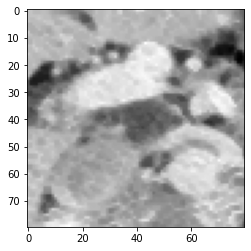

In [39]:
'''
Author: Sal Choueib
Student No. : 10188460
Class: CISC881
Description:

This script will read in numpy arrays and run them through custom CNN architeture for binary classification. 

'''
#Import the data 

import SimpleITK as sitk
import os
import pathlib as pathlib
import numpy
import pandas as pd
import matplotlib.pyplot as mlp
from scipy.ndimage.interpolation import rotate
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# In[86]:


#load data

def reshape_patch(patch):
    fd = patch.shape
    print(fd)
    patch = numpy.reshape(patch, (80,80,fd[2],1))
    patch = numpy.transpose(patch,(2,0,1,3))
    print(patch.shape)
    return patch


labels = numpy.load("c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/train/labels.npy")
ct_patches=reshape_patch(numpy.load( "c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/train/ct_patches.npy"))
x_test = reshape_patch(numpy.load("c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/test/ct_patches.npy"))
y_test = numpy.load("c:/users/salch/pancreasCNN/data/augmentations/_balancedRotate_randomZoom/test/labels.npy")


plt.figure(1)
plt.imshow(ct_patches[12,:,:,0], cmap='gray')


# In[88]:

Epoch 1/6
108/108 [==============================] - 65s 606ms/step - loss: 0.5797 - binary_accuracy: 0.6646 - auc: 0.6841 - accuracy: 0.6646 - val_loss: 0.6772 - val_binary_accuracy: 0.6693 - val_auc: 0.7025 - val_accuracy: 0.6693
Epoch 2/6
108/108 [==============================] - 65s 604ms/step - loss: 0.5981 - binary_accuracy: 0.6716 - auc: 0.7001 - accuracy: 0.6716 - val_loss: 0.5786 - val_binary_accuracy: 0.6701 - val_auc: 0.6523 - val_accuracy: 0.6701
Epoch 3/6
108/108 [==============================] - 64s 594ms/step - loss: 0.5807 - binary_accuracy: 0.6817 - auc: 0.6852 - accuracy: 0.6817 - val_loss: 0.7270 - val_binary_accuracy: 0.6641 - val_auc: 0.6844 - val_accuracy: 0.6641
Epoch 4/6
108/108 [==============================] - 64s 594ms/step - loss: 0.5643 - binary_accuracy: 0.6887 - auc: 0.7003 - accuracy: 0.6887 - val_loss: 0.5846 - val_binary_accuracy: 0.6727 - val_auc: 0.6888 - val_accuracy: 0.6727
Epoch 5/6
108/108 [==============================] - 64s 596ms/step - lo

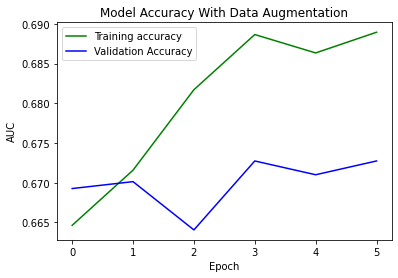

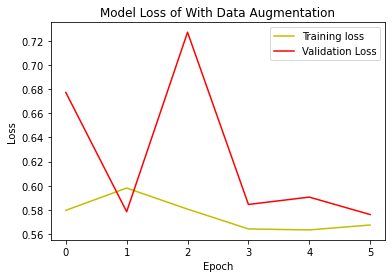

In [38]:

##Convolutional Netwrok

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, InputLayer,Activation,BatchNormalization,LeakyReLU,Dropout


##Deep CNN Model

def cnn_build_2():

    model = Sequential()
    model.add(InputLayer(input_shape = (80,80,1))) #defines the shape of the input data

    #module 1
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1),padding='same')) #2d convolution with a kernel size of 3x3 that will slide across the image and extract features
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1),padding='same'))
    model.add(MaxPool2D(pool_size=(2,2),strides=2)) #MAx pool layer that will take the maximum value from a specified neighborhood, to decrease the spatial dimensions of the image

    #module 2
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))#2d convolution with a kernel size of 3x3 that will slide across the image and extract features
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Dropout(0.2))
    model.add(MaxPool2D(pool_size=(2,2),strides=2))#MAx pool layer that will take the maximum value from a specified neighborhood, to decrease the spatial dimensions of the image
 

    #module 3
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2),strides=2))

    
    #modle 4
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Dropout(0.2))
    

    #this layer is required since we want to map the image input into a binary classification.
    model.add(Flatten()) #64x64x10 into 1D 40960
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

seed = 7
numpy.random.seed(seed)

x_train, x_val, y_train, y_val = train_test_split(ct_patches, labels, test_size=0.25,random_state=seed)



model = cnn_build_2()

history = model.compile(loss='binary_crossentropy', metrics=['binary_accuracy','AUC','accuracy'], optimizer='adam')
history = model.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=32, epochs=6)
print('\n\n')
model.summary()
print('\n\n')
model.evaluate(x=x_test, y=y_test)

print('\n\n\n')

#Plotting

plt.plot(history.history['binary_accuracy'], 'g', label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], 'b', label='Validation accuracy')
plt.title('Model Accuracy With Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Training accuracy','Validation Accuracy','Accuracy'], loc='upper left')
plt.show()


# In[98]:


plt.plot(history.history['loss'], 'y')
plt.plot(history.history['val_loss'], 'r')
plt.title('Model Loss of With Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation Loss'], loc='upper right')
plt.show()



# Inception Module Comparison



In [29]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input,Activation,BatchNormalization,LeakyReLU,Dropout

inc_model= keras.applications.InceptionV3(
    include_top=False,
    input_shape=(80,80,3),
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

input_tensor = Input(shape=(80,80,1))
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (img_height,img_width,3)
out1 = inc_model(x)
flat = Flatten()(out1)
d1 = Dense(256,activation='relu')(flat)
d2 = BatchNormalization()(d1)
d3 = Dropout(0.25)(d2)
d4 = Dense(64,activation='relu')(d3)
d5 = Dense(32,activation='relu')(d4)
d6 = Dropout(0.25)(d5)
d7 = Dense(1, activation='softmax')(d6)


model2 = keras.Model(inputs = input_tensor, outputs = d7)

seed = 7
numpy.random.seed(seed)

x_train, x_val, y_train, y_val = train_test_split(ct_patches, labels, test_size=0.25,random_state=seed)


history = model2.compile(loss='binary_crossentropy', metrics=['binary_accuracy','AUC','accuracy'], optimizer='adam')
history = model2.fit(x_train,y_train,validation_data=(x_val,y_val), batch_size=32, epochs=10)
print('\n\n')
model2.summary()
print('\n\n')
model2.evaluate(x=x_test, y=y_test)

Epoch 1/10
108/108 [==============================] - 72s 670ms/step - loss: 8.1276 - binary_accuracy: 0.4670 - auc: 0.5000 - accuracy: 0.4670 - val_loss: 7.9158 - val_binary_accuracy: 0.4809 - val_auc: 0.5000 - val_accuracy: 0.4809
Epoch 2/10
108/108 [==============================] - 71s 656ms/step - loss: 8.1276 - binary_accuracy: 0.4670 - auc: 0.5000 - accuracy: 0.4670 - val_loss: 7.9158 - val_binary_accuracy: 0.4809 - val_auc: 0.5000 - val_accuracy: 0.4809
Epoch 3/10
108/108 [==============================] - 71s 654ms/step - loss: 8.1276 - binary_accuracy: 0.4670 - auc: 0.5000 - accuracy: 0.4670 - val_loss: 7.9158 - val_binary_accuracy: 0.4809 - val_auc: 0.5000 - val_accuracy: 0.4809
Epoch 4/10
108/108 [==============================] - 70s 653ms/step - loss: 8.1276 - binary_accuracy: 0.4670 - auc: 0.5000 - accuracy: 0.4670 - val_loss: 7.9158 - val_binary_accuracy: 0.4809 - val_auc: 0.5000 - val_accuracy: 0.4809
Epoch 5/10
108/108 [==============================] - 70s 649ms/step

[12.934621810913086, 0.1517857164144516, 0.5, 0.1517857164144516]